In [46]:
import numpy as np
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt

In [30]:
traffic_a = pd.read_csv('/Users/davidnyberg/Downloads/us-traffic-2015/dot_traffic_stations_2015.txt.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

In [32]:
traffic_main = pd.read_csv('/Users/davidnyberg/Downloads/us-traffic-2015/dot_traffic_2015.txt.gz', compression='gzip', 
                         header=0, sep=',', quotechar='"')

In [33]:
traffic_main.head(10)

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,...,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,...,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,...,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,...,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,...,83,61,55,35,29,21,23,9,7,15
5,2015-07-25,25,7,5,South,44,2U,Urban: Principal Arterial - Other Freeways or ...,0,7,...,2673,2746,2564,2257,2140,2060,2156,1873,1590,15
6,2015-09-10,10,5,3,East,19,3U,Urban: Principal Arterial - Other,2,9,...,542,571,559,395,351,262,217,153,61,15
7,2015-10-27,27,3,3,East,36,4U,Urban: Minor Arterial,1,10,...,238,278,250,154,130,84,56,21,14,15
8,2015-06-26,26,6,7,West,42,1R,Rural: Principal Arterial - Interstate,2,6,...,740,784,822,703,425,192,159,150,168,15
9,2015-05-12,12,3,5,South,40,2U,Urban: Principal Arterial - Other Freeways or ...,2,5,...,1662,1673,1519,1148,914,808,555,468,270,15


In [37]:
#remove the year_of_data column from each table as this is redudent information - all data is 2015
traffic_a = traffic_a.drop(['year_of_data'],axis = 1)
traffic_main = traffic_main.drop(['year_of_data'], axis = 1)

ValueError: labels ['year_of_data'] not contained in axis

In [38]:
#def num_missing(x):
#    return sum(x.isnull())

#print(traffic_a.apply(num_missing, axis=0))
#print(traffic_b.apply(num_missing, axis=0))

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,...,129,89,122,124,110,69,73,28,12,6
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,...,1453,1617,1669,1308,1068,928,885,798,650,613
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,...,4077,4244,4405,4609,4361,3272,2243,2050,1453,892
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,...,1043,1011,959,851,708,559,457,297,207,110
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,...,87,83,61,55,35,29,21,23,9,7
5,2015-07-25,25,7,5,South,44,2U,Urban: Principal Arterial - Other Freeways or ...,0,7,...,2700,2673,2746,2564,2257,2140,2060,2156,1873,1590
6,2015-09-10,10,5,3,East,19,3U,Urban: Principal Arterial - Other,2,9,...,539,542,571,559,395,351,262,217,153,61
7,2015-10-27,27,3,3,East,36,4U,Urban: Minor Arterial,1,10,...,217,238,278,250,154,130,84,56,21,14
8,2015-06-26,26,6,7,West,42,1R,Rural: Principal Arterial - Interstate,2,6,...,751,740,784,822,703,425,192,159,150,168
9,2015-05-12,12,3,5,South,40,2U,Urban: Principal Arterial - Other Freeways or ...,2,5,...,1364,1662,1673,1519,1148,914,808,555,468,270


In [74]:
#traffic_main[pd.notnull(traffic_main['lane_of_travel'])]

#testing some things to remove NaNs
#traffic_main['lane_of_travel'].replace('', np.nan, inplace=True)
#traffic_main.dropna(thresh = 1)


In [53]:
traffic_main['lane_of_travel'].value_counts()

1    2849316
2    1799970
0    1695513
3     527434
4     185915
5      53827
6      21265
7       6176
8        905
9         70
Name: lane_of_travel, dtype: int64

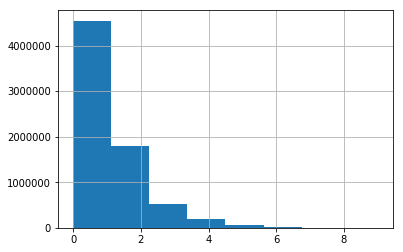

In [50]:
traffic_main['lane_of_travel'].hist(bins = 8)
plt.show()

In [57]:
#traffic_main.plot(x = 'lane_of_travel', y = 'traffic_volume_counted_after_1900_to_2000', kind = 'density')
#traffic_main.plot(x = 'lane_of_travel', y = 'traffic_volume_counted_after_1200_to_1300', kind = 'hist')
#plt.show()

In [76]:
traffic_main.dropna()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400


In [77]:
traffic_main.shape

(7140391, 37)